Saving sample5.jpg to sample5.jpg
Level 0 - Original


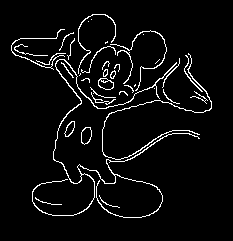

Level 1 - Half Size


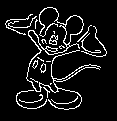

Level 2 - Quarter Size


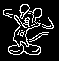

Level 3 - One-Eighth Size


In [1]:
# =========================================
# Gaussian Pyramid + Edge Detection
# =========================================

!pip install opencv-python-headless -q

import cv2
from google.colab import files
from google.colab.patches import cv2_imshow

# Step 1: Upload Image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Step 2: Read Image
img = cv2.imread(filename)

# Convert to grayscale (better for edge detection)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# -----------------------------------------
# Step 3: Generate Gaussian Pyramid
# -----------------------------------------

level0 = gray
level1 = cv2.pyrDown(level0)   # Half size
level2 = cv2.pyrDown(level1)   # Quarter size
level3 = cv2.pyrDown(level2)   # One-eighth size

# -----------------------------------------
# Step 4: Apply Canny Edge Detection
# -----------------------------------------

edge0 = cv2.Canny(level0, 100, 200)
edge1 = cv2.Canny(level1, 100, 200)
edge2 = cv2.Canny(level2, 100, 200)
edge3 = cv2.Canny(level3, 100, 200)

# -----------------------------------------
# Step 5: Display Results
# -----------------------------------------

print("Level 0 - Original")
cv2_imshow(edge0)

print("Level 1 - Half Size")
cv2_imshow(edge1)

print("Level 2 - Quarter Size")
cv2_imshow(edge2)

print("Level 3 - One-Eighth Size")
cv2_imshow(edge3)


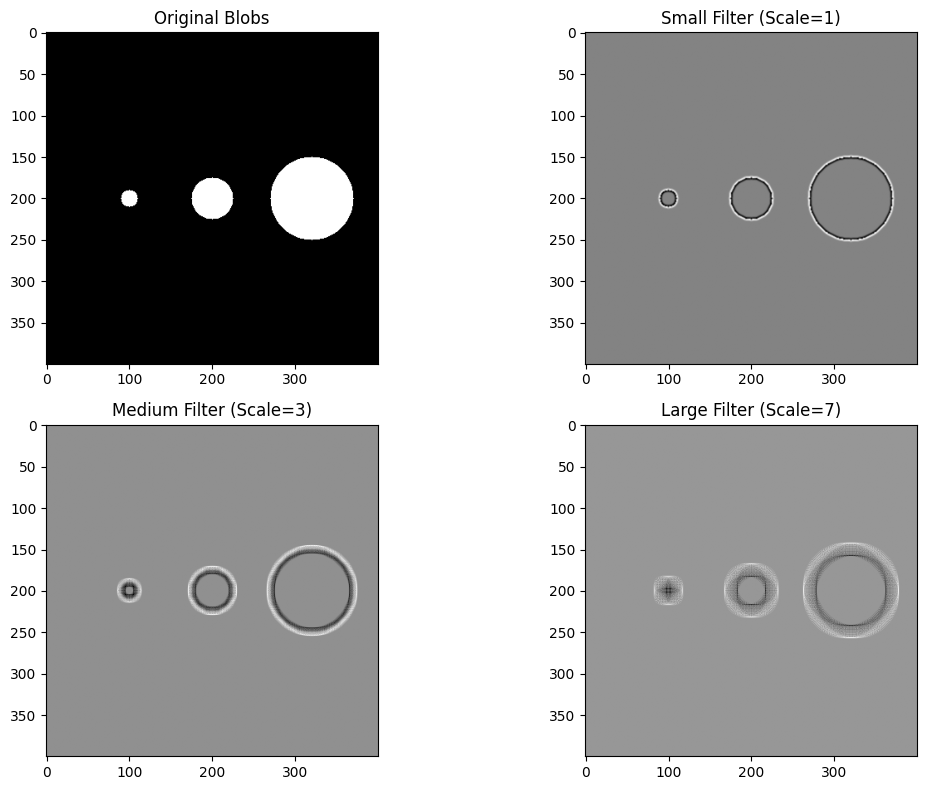

In [2]:
# =========================================
# Activity 2: Matching Game - Find the Feature
# =========================================

!pip install opencv-python-headless -q

import cv2
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------
# Step 1: Create Synthetic Blob Image
# ------------------------------------------

img = np.zeros((400, 400), dtype=np.uint8)

# Draw blobs of different sizes
cv2.circle(img, (100, 200), 10, 255, -1)   # Small blob
cv2.circle(img, (200, 200), 25, 255, -1)   # Medium blob
cv2.circle(img, (320, 200), 50, 255, -1)   # Large blob

# ------------------------------------------
# Step 2: Apply Laplacian of Gaussian (LoG)
# ------------------------------------------

# Small scale filter
blur1 = cv2.GaussianBlur(img, (5,5), 1)
log1 = cv2.Laplacian(blur1, cv2.CV_64F)

# Medium scale filter
blur2 = cv2.GaussianBlur(img, (9,9), 3)
log2 = cv2.Laplacian(blur2, cv2.CV_64F)

# Large scale filter
blur3 = cv2.GaussianBlur(img, (15,15), 7)
log3 = cv2.Laplacian(blur3, cv2.CV_64F)

# ------------------------------------------
# Step 3: Display Results
# ------------------------------------------

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.title("Original Blobs")
plt.imshow(img, cmap='gray')

plt.subplot(2,2,2)
plt.title("Small Filter (Scale=1)")
plt.imshow(log1, cmap='gray')

plt.subplot(2,2,3)
plt.title("Medium Filter (Scale=3)")
plt.imshow(log2, cmap='gray')

plt.subplot(2,2,4)
plt.title("Large Filter (Scale=7)")
plt.imshow(log3, cmap='gray')

plt.tight_layout()
plt.show()


Saving Screenshot 2026-02-12 133419.png to Screenshot 2026-02-12 133419.png
Saving Screenshot 2026-02-13 114109.png to Screenshot 2026-02-13 114109 (2).png
Number of matches: 43


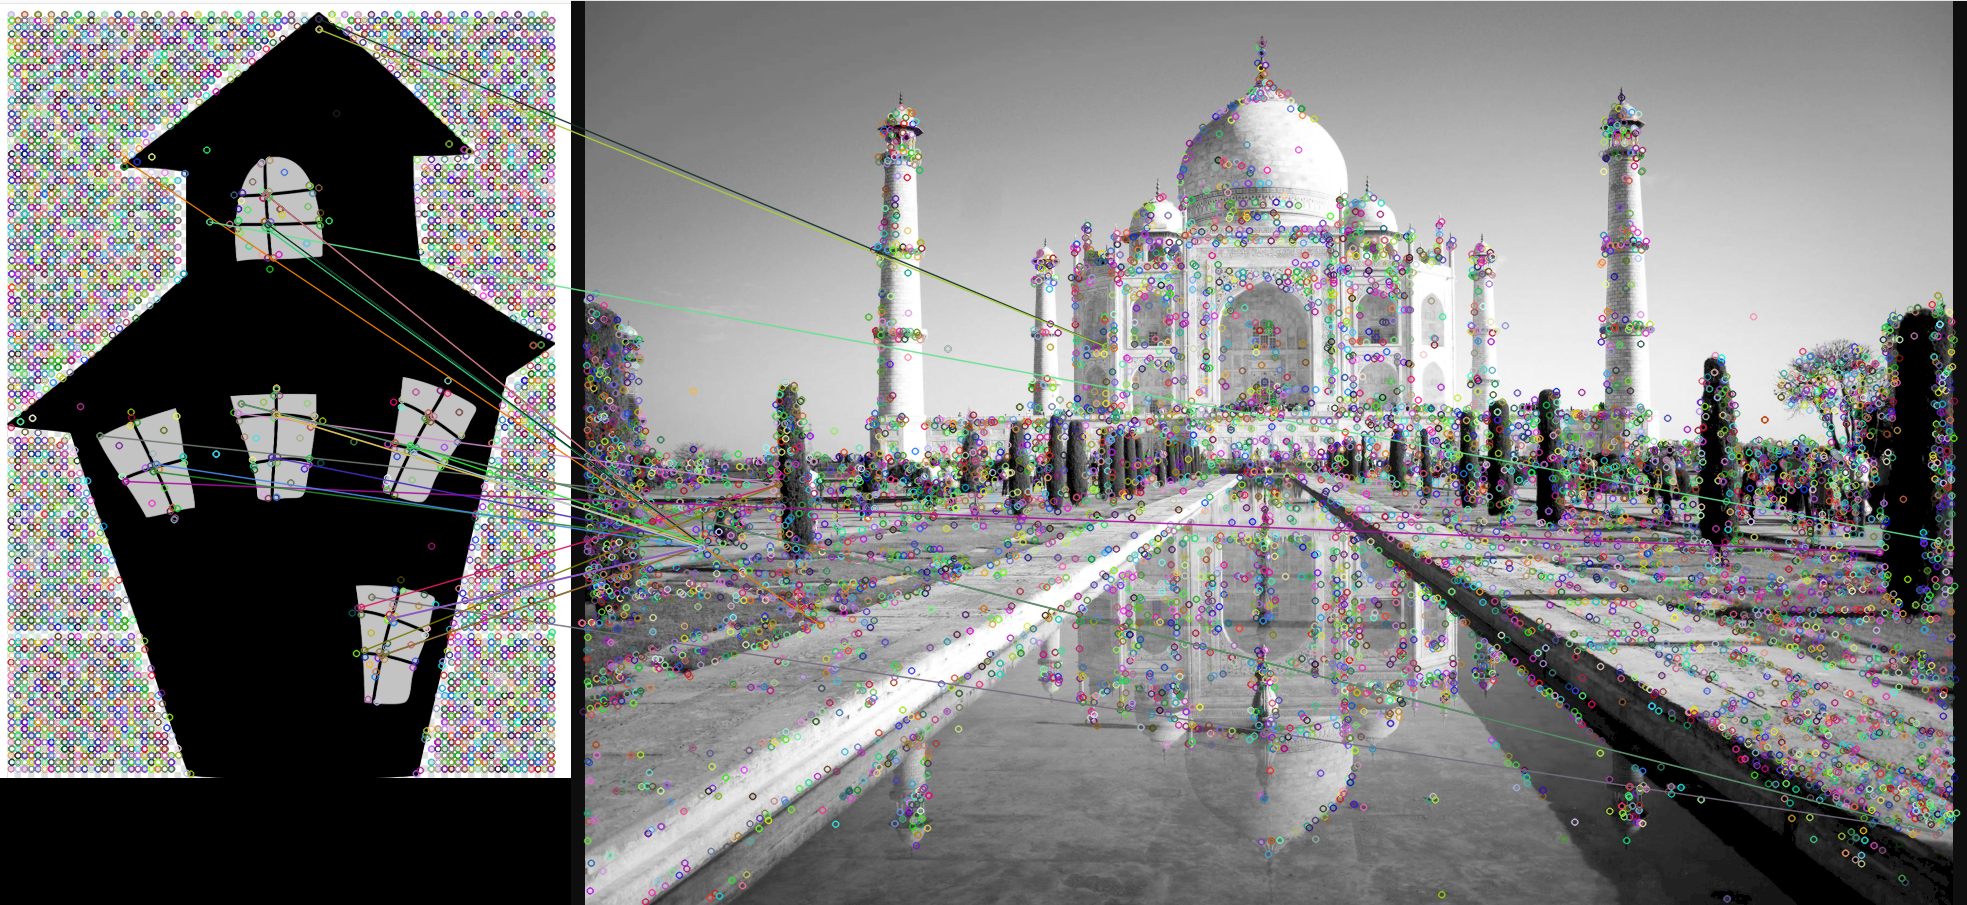

In [9]:
!pip install opencv-python-headless -q

import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

# Upload two images
uploaded = files.upload()
file_names = list(uploaded.keys())

img1 = cv2.imread(file_names[0], 0)
img2 = cv2.imread(file_names[1], 0)

# Create SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Feature matching
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)

print("Number of matches:", len(good))

# Draw matches
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, good[:30], None)
cv2_imshow(matched_img)


Saving Screenshot 2026-02-13 114819.png to Screenshot 2026-02-13 114819.png


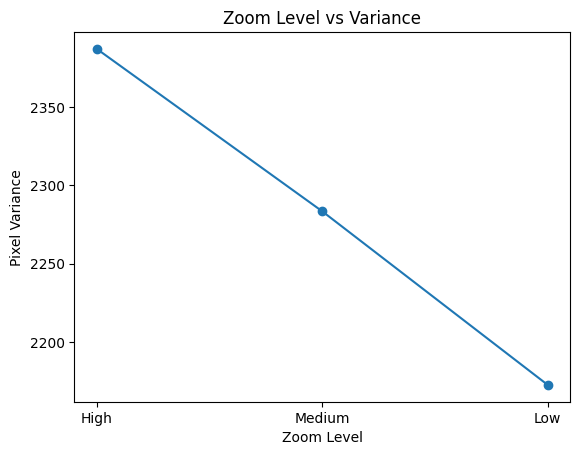

Variances: [np.float64(2387.112033158896), np.float64(2283.4662044296), np.float64(2172.6996446830185)]


In [10]:
!pip install opencv-python-headless matplotlib -q

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload one image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

img = cv2.imread(filename, 0)

# Create different resolutions
high = img
medium = cv2.pyrDown(high)
low = cv2.pyrDown(medium)

images = [high, medium, low]
labels = ["High", "Medium", "Low"]

variances = []

for im in images:
    flat = im.flatten()
    variances.append(np.var(flat))

# Plot
plt.plot(labels, variances, marker='o')
plt.xlabel("Zoom Level")
plt.ylabel("Pixel Variance")
plt.title("Zoom Level vs Variance")
plt.show()

print("Variances:", variances)
